In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import urllib
import functions as f
import visualise as vis
import algorythm as alg
import math
from sklearn.cluster import KMeans
import sklearn
import scipy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv(r'./dataset/mount2.csv', header=0, sep =',')

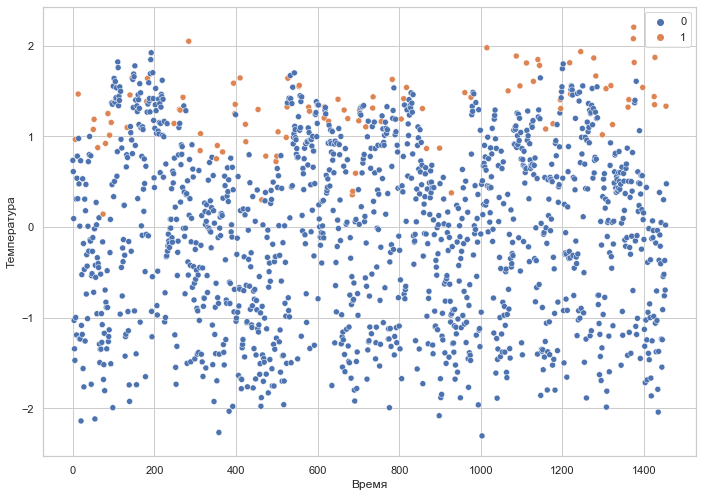

In [3]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
plot = sns.scatterplot(data = data, x="id", y="temperatureAvg",  alpha = 1, hue = 'markup', legend = 'full' )
plot.set_ylabel('Температура')
plot.set_xlabel('Время')
plot.legend(loc='upper right')

In [4]:
input_size = 16
x_ = np.empty((0,input_size))
y_ = np.empty((0,1))
a,b = f.create_data(data, input_size)
x_ = np.append(x_,a, axis=0)
y_ = np.append(y_,b)

In [5]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight= 'balanced', classes= np.unique(y_),y= y_)
class_weights = dict(zip(np.unique(y_), class_weights))
class_weights

{0.0: 0.5365398956002982, 1.0: 7.341836734693878}

In [6]:
x_train, y_train = x_[:1100], y_[:1100]
x_val, y_val = x_[1100:], y_[1100:]

In [7]:
inputs = keras.Input(shape=(input_size,))
dense_1 = layers.Dense(128, activation = "ReLU")(inputs)
dense_2 = layers.Dense(4, activation = "ReLU")(dense_1)
outputs = layers.Dense(1, activation = "sigmoid")(dense_2)
model = keras.Model(inputs=inputs, outputs=outputs, name="thermal-model")
model.summary()

Model: "thermal-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense (Dense)               (None, 128)               2176      
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 2,697
Trainable params: 2,697
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss="binary_crossentropy", optimizer='RMSprop')
model.save_weights('initial')

In [19]:
model.load_weights('initial')
history = model.fit(x=x_train, y=y_train, validation_data = (x_val, y_val), verbose=1, batch_size=32, epochs = 30, class_weight=dict(class_weights))

Epoch 1/30
35/35 [==============================] - 0s 4ms/step - loss: 0.6689 - val_loss: 0.6661
Epoch 2/30
35/35 [==============================] - 0s 2ms/step - loss: 0.5577 - val_loss: 0.5470
Epoch 3/30
35/35 [==============================] - 0s 2ms/step - loss: 0.4619 - val_loss: 0.5050
Epoch 4/30
35/35 [==============================] - 0s 2ms/step - loss: 0.3890 - val_loss: 0.4189
Epoch 5/30
35/35 [==============================] - 0s 2ms/step - loss: 0.3354 - val_loss: 0.3308
Epoch 6/30
35/35 [==============================] - 0s 2ms/step - loss: 0.2985 - val_loss: 0.2953
Epoch 7/30
35/35 [==============================] - 0s 2ms/step - loss: 0.2706 - val_loss: 0.2597
Epoch 8/30
35/35 [==============================] - 0s 2ms/step - loss: 0.2431 - val_loss: 0.2728
Epoch 9/30
35/35 [==============================] - 0s 2ms/step - loss: 0.2218 - val_loss: 0.2260
Epoch 10/30
35/35 [==============================] - 0s 2ms/step - loss: 0.2085 - val_loss: 0.2404
Epoch 11/30
35/35 [

In [36]:
model.save_weights('.\models\weight.h5')

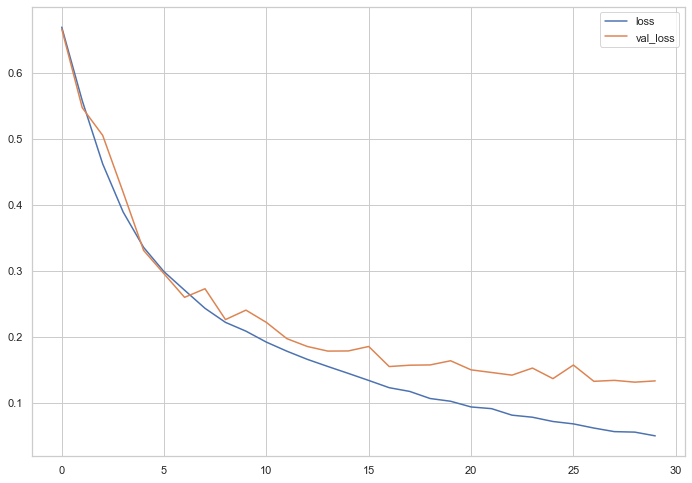

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

In [21]:
prediction = model.predict(x_train)

Text(0, 0.5, 'temperatureAvg -\n температура кадра')

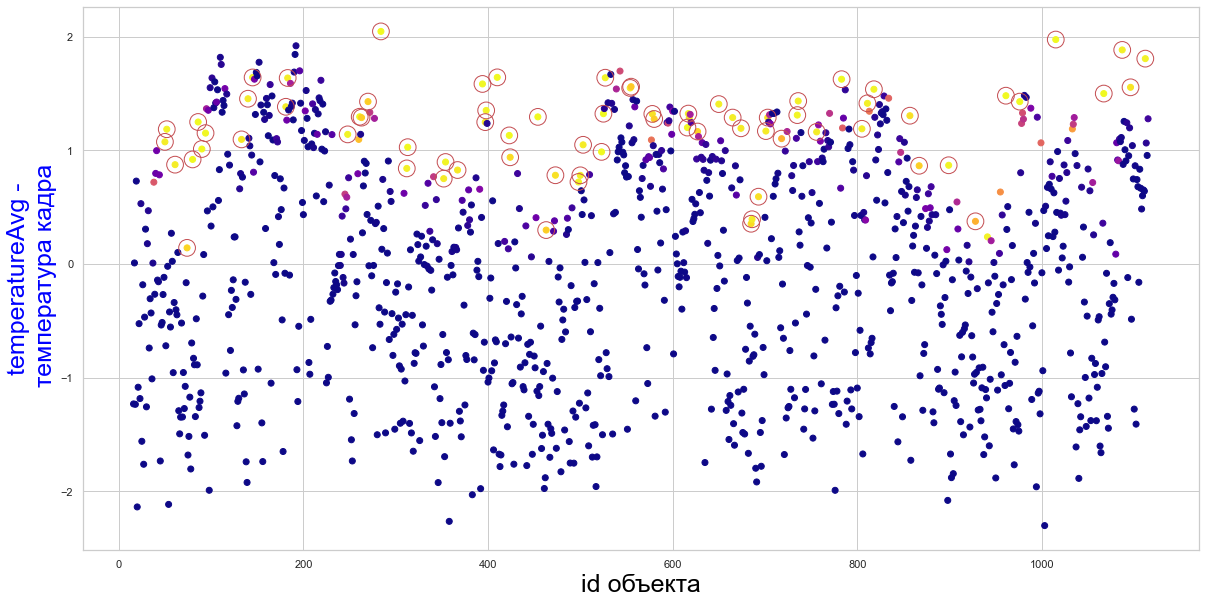

In [22]:
fig = plt.figure(figsize=(20, 10))
plot = fig.add_subplot(111)
plot.scatter(data = data[input_size:1100 + input_size], x = 'id', y = 'temperatureAvg', c=prediction, alpha=1, cmap = 'plasma')
plot.scatter(data = data[input_size:1100 + input_size].loc[data[input_size:1100 + input_size]['markup'] == 1], x = 'id', y = 'temperatureAvg', alpha=1, s = 280, edgecolors ='r', facecolors = 'none')
plot.set_xlabel('id объекта', fontsize = 25, color = 'black')
plot.set_ylabel('temperatureAvg -\n температура кадра', fontsize = 25, color = 'blue')

In [23]:
matrix_preidction = prediction > 0.5
matrix = confusion_matrix(y_train, matrix_preidction)

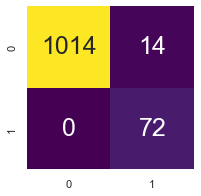

The precision score is: 0.84
The recall score is: 1.00 

Accuracy score is: 0.99
The F1 score is: 0.91


In [24]:
plt.figure(figsize = (3,3))
sns.heatmap(matrix, annot=True, annot_kws={"size": 25}, fmt="d", cmap="viridis", cbar=False)
plt.show()
print("The precision score is: %.2f" % precision_score( y_train, matrix_preidction))
print("The recall score is: %.2f" % recall_score( y_train, matrix_preidction), "\n")
print("Accuracy score is: %.2f" % accuracy_score( y_train, matrix_preidction))
print("The F1 score is: %.2f" % f1_score( y_train, matrix_preidction))

In [25]:
prediction = model.predict(x_val)

Text(0, 0.5, 'temperatureAvg -\n температура кадра')

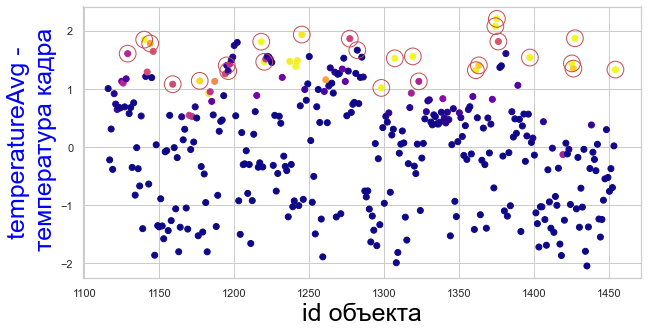

In [26]:
fig = plt.figure(figsize=(10, 5))
plot = fig.add_subplot(111)
plot.scatter(data = data[1100+input_size:-1], x = 'id', y = 'temperatureAvg', c=prediction, alpha=1, cmap = 'plasma')
plot.scatter(data = data[1100+input_size:-1].loc[data[1100+input_size:-1]['markup'] == 1], x = 'id', y = 'temperatureAvg', alpha=1, s = 280, edgecolors ='r', facecolors = 'none')
plot.set_xlabel('id объекта', fontsize = 25, color = 'black')
plot.set_ylabel('temperatureAvg -\n температура кадра', fontsize = 25, color = 'blue')

In [27]:
matrix_preidction = prediction > 0.5
matrix = confusion_matrix(y_val, matrix_preidction)

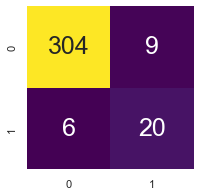

The precision score is: 0.69
The recall score is: 0.77 

Accuracy score is: 0.96
The F1 score is: 0.73


In [28]:
plt.figure(figsize = (3,3))
sns.heatmap(matrix, annot=True, annot_kws={"size": 25}, fmt="d", cmap="viridis", cbar=False)
plt.show()
print("The precision score is: %.2f" % precision_score( y_val, matrix_preidction))
print("The recall score is: %.2f" % recall_score( y_val, matrix_preidction), "\n")
print("Accuracy score is: %.2f" % accuracy_score( y_val, matrix_preidction))
print("The F1 score is: %.2f" % f1_score( y_val, matrix_preidction))

In [ ]:
sochi = pd.read_csv(r'./dataset/Sochi10-11.csv', header=0, sep=',')
sochi = sochi.loc[sochi['temperatureAvg'] > 1]
sochi = sochi.loc[sochi['id'] > 930]
sochi = sochi.loc[sochi['temperatureAvg'] < 3500]

model_ = f.Model(sochi, 7)
model_.filter(2.5)
sochi = model_.df_all

In [ ]:
data_mean_list_sochi = f.mean_list(sochi)

In [ ]:
data_mean_list_sochi['temperatureAvg'] -= data_mean_list_sochi['temperatureAvg'].mean()
data_mean_list_sochi['temperatureAvg'] /= data_mean_list_sochi['temperatureAvg'].std()
data_mean_list_sochi['markup'] = 0
data_mean_list_sochi

In [ ]:
fig = plt.figure(figsize=(10, 5))
plot = fig.add_subplot(111)
plot.scatter(data = data_mean_list_sochi, x = 'id', y = 'temperatureAvg', alpha=1, cmap = 'plasma')
plot.set_xlabel('id объекта', fontsize = 25, color = 'black')
plot.set_ylabel('temperatureAvg -\n температура кадра', fontsize = 25, color = 'blue')

In [ ]:
x_sochi,b = f.create_data(data_mean_list_sochi, 16)
prediction = model.predict(x_sochi)

In [ ]:
fig = plt.figure(figsize=(5, 5))
plot = fig.add_subplot(111)
plot.scatter(np.arange(start=0, stop=len(prediction)), x_sochi[:, 0], c=prediction, alpha=0.7, cmap = 'jet')
plot.scatter(3, [x_sochi[3, 0]], alpha=1, s = 180, edgecolors ='r', facecolors = 'none')
plot.set_xlabel('id объекта', fontsize = 25, color = 'black')
plot.set_ylabel('temperatureAvg -\n температура кадра', fontsize = 25, color = 'blue')
print(prediction[3])